# PUNTO 6

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Constantes
G = 39.5  # Constante gravitacional en unidades astronómicas^3 / año^2 / masa solar
M_sun = 1  # Masa del sol en unidades de masa solar
alpha = 1.1e-8  # Valor de alpha en unidades astronómicas cuadradas
a = 0.387098  # Semieje mayor en unidades astronómicas
e = 0.205630  # Excentricidad de la órbita
dt = 0.0001  # Paso temporal ajustado

# Condiciones iniciales en el afelio
r0 = np.array([a * (1 + e), 0])  # Posición inicial
v0 = np.array([0, np.sqrt((G * M_sun * (1 - e)) / (a * (1 + e)))])  # Velocidad inicial

In [3]:
# Función para calcular la aceleración considerando la corrección de la Relatividad General
def acceleration(r):
    r_norm = np.linalg.norm(r)
    return -G * M_sun * r / r_norm**3 * (1 + alpha / r_norm**2)

In [4]:
# Método de Verlet modificado
def verlet_modificado(r0, v0, dt, num_orbits):
    orbit_period = 88  # Período orbital de Mercurio en días
    num_steps = int((orbit_period / 365.25) / dt) * num_orbits  # Convertir el tiempo de días a años
    r = np.zeros((num_steps, 2))
    v = np.zeros((num_steps, 2))
    r[0] = r0
    v[0] = v0

    for i in range(num_steps - 1):
        r[i + 1] = r[i] + v[i] * dt + 0.5 * acceleration(r[i]) * dt**2
        v[i + 1] = v[i] + 0.5 * (acceleration(r[i + 1]) + acceleration(r[i])) * dt

    return r, v

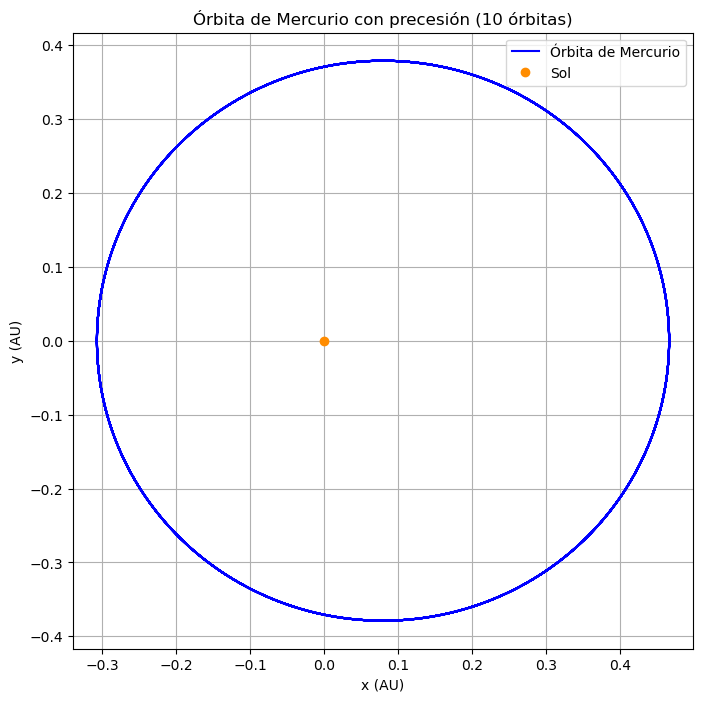

In [5]:
# Simulación para 1 órbita para demostración
r, v = verlet_modificado(r0, v0, dt, 10)

# Graficar la trayectoria de Mercurio
plt.figure(figsize=(8, 8))
plt.plot(r[:, 0], r[:, 1], label='Órbita de Mercurio', color = 'blue')
plt.plot(0, 0, 'o', label='Sol', color = 'darkorange')  # Representar el Sol
plt.xlabel('x (AU)')
plt.ylabel('y (AU)')
plt.title('Órbita de Mercurio con precesión (10 órbitas)')
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()